<a href="https://colab.research.google.com/github/Mar-celo/Enap/blob/master/pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento



## Dados categóricos

### Categóricos ordinais

In [1]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
#import matplotlib as mpl
import pandas as pd

In [ ]:
enc = OrdinalEncoder()
df = pd.DataFrame([['Feminino', 18, 0.50], ['Masculino', 25, 0.15], ['Feminino', 50, 0.25]], 
                  columns=['sexo', 'idade', 'desconto'])
df

,sexo,idade,desconto
0,Feminino,18,0.50
1,Masculino,25,0.15
2,Feminino,50,0.25


In [ ]:
enc.fit(df)

OrdinalEncoder()

In [ ]:
enc.categories_

[array(['Feminino', 'Masculino'], dtype=object),
 array([18, 25, 50], dtype=int64),
 array([0.15, 0.25, 0.5 ])]

In [ ]:
enc.transform([['Feminino', 18, 0.50], ['Masculino', 25, 0.15], ['Feminino', 50, 0.25]])

array([[0., 0., 2.],
       [1., 1., 0.],
       [0., 2., 1.]])

In [ ]:
enc.inverse_transform([[1, 2, 0], [0, 1, 2], [0, 0, 1]])

array([['Masculino', 50, 0.15],
       ['Feminino', 25, 0.5],
       ['Feminino', 18, 0.25]], dtype=object)

In [ ]:
enc2 = OrdinalEncoder()
df['sexo_cod'] = enc2.fit_transform(df[['sexo']])
df

,sexo,idade,desconto,sexo_cod
0,Feminino,18,0.50,0.0
1,Masculino,25,0.15,1.0
2,Feminino,50,0.25,0.0


In [ ]:
enc2.inverse_transform(df[['sexo_cod']])

array([['Feminino'],
       ['Masculino'],
       ['Feminino']], dtype=object)

### categóricos nominais

Car Evaluation Data Set: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

|   var   |     níveis             |
|---------|------------------------|
| buying  | v-high, high, med, low |
| maint   | v-high, high, med, low |
| doors   | 2, 3, 4, 5more         |
| persons | 2, 4, more             |
| lug_boot| small, med, big        |
| safety  | low, med, high         |
|-------- |------------------------|
| car     |unacc, acc, good, v-good|

 
Class Distribution (number of instances per class)

| class | N  | N(%) |
|-------|----|------|
|unacc  |1210|70%   |
|  acc  |384 |22%   |
| good  | 69 | 4%   |
|v-good | 65 | 4%   |


In [ ]:
# Baixar os dados do UCI
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

'wget' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names'

'wget' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

import pandas as pd

In [ ]:
# Pode-se usar diretamente a função read_csv() do pandas para ler o dataset remoto
# Ou ler uma cópia local
df = pd.read_csv('car.data', sep=',', header=None)

In [ ]:
df.columns = ['buying','maint', 'doors', 'persons', 'lug_boot', 'safety', 'car']

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,car
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,2,2,big,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
X = pd.get_dummies(df.iloc[:,:-1])
X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [ ]:
y = df.car
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: car, Length: 1728, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123)

In [ ]:
logReg = LogisticRegression(C=1, solver='lbfgs', multi_class='auto')
logReg.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
logReg.score(X_test, y_test)

0.8961538461538462

In [ ]:
from sklearn.metrics import plot_confusion_matrix

Matriz de confusão
[[ 51   3   2   1]
 [  7   2   0   2]
 [ 12   0 170   0]
 [  0   0   0  10]]


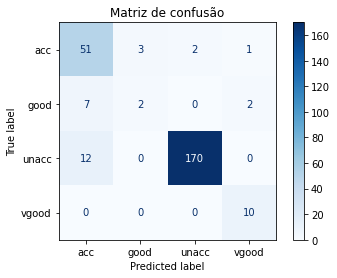

In [ ]:
class_names = ['acc','good','unacc','vgood']
title = 'Matriz de confusão'
disp = plot_confusion_matrix(logReg, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues,values_format='',
                              normalize=None)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
confusion_matrix(y_test, logReg.predict(X_test))

array([[ 51,   3,   2,   1],
       [  7,   2,   0,   2],
       [ 12,   0, 170,   0],
       [  0,   0,   0,  10]], dtype=int64)

In [ ]:
# Modelando com OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordEnc = OrdinalEncoder()

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
X = ordEnc.fit_transform(df.iloc[:, :-1])
X

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123)

In [ ]:
logReg = LogisticRegression(C=1, solver='lbfgs', multi_class='auto')
logReg.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
logReg.score(X_test, y_test)

0.7

In [ ]:
# Não respeitamos a ordem das categorias
# Façamos um encoding manual, respeitando essas ordens relativas
encoding = {
    'low': 0,
    'small': 0,
    'med': 1,
    'high': 2,
    'big': 2,
    2: 0,
    3: 1,
    4: 2,
    'more': 3,
    '5more': 3,
    'vhigh': 3
}

In [ ]:
X = df.replace(encoding).iloc[:, :-1]
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1
...,...,...,...,...,...,...
1723,0,0,3,3,1,1
1724,0,0,3,3,1,2
1725,0,0,3,3,2,0
1726,0,0,3,3,2,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123)

In [ ]:
logReg = LogisticRegression(C=1, solver='lbfgs', multi_class='auto', max_iter=500)
logReg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=500)

In [ ]:
logReg.score(X_test, y_test)

0.85

#### Conclusão

No nosso experimento, treinamos modelos de regressão logística sobre os dados de aceitabilidade de carros com diferentes codificações, gerando os seguintes resultados:

- one-hot encoding: 89,6%
- ordinal encoding (sem seguir a ordem das categorias): 70%
- substituição, seguindo a ordem relativa das categorias: 85%